In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

bd_df = pd.read_csv('/content/drive/My Drive/bcan_test/building.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
repo_df = pd.read_csv('/content/drive/My Drive/bcan_test/reporting.csv')

In [15]:
bd_df.head()

,TaxParcel,GrossAreasqft,PropertyName,PropertyType,PropertyUses,YearBuilt,data_from
0,502640000,55220,NaN,APT 7-30 UNITS,NaN,NaN,2021
1,2201177000,46686,NaN,"CHURCH, SYNAGOGUE",NaN,NaN,2021
2,402222010,123120,NaN,COLLEGE,NaN,NaN,2021
3,2102478000,48655,NaN,CONDO MAIN,NaN,NaN,2021
4,1103322000,20854,NaN,CONDO MAIN,NaN,NaN,2021


In [16]:
# prompt: check datatype and missing value in the bd_df

# Check data types
print("Data Types:\n", bd_df.dtypes)

# Check for missing values
print("\nMissing Values:\n", bd_df.isnull().sum())


Data Types:
 TaxParcel         object
GrossAreasqft     object
PropertyName      object
PropertyType      object
PropertyUses      object
YearBuilt        float64
data_from          int64
dtype: object

Missing Values:
 TaxParcel          0
GrossAreasqft     34
PropertyName     631
PropertyType       3
PropertyUses     643
YearBuilt        631
data_from          0
dtype: int64


In [17]:
bd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TaxParcel      3609 non-null   object 
 1   GrossAreasqft  3575 non-null   object 
 2   PropertyName   2978 non-null   object 
 3   PropertyType   3606 non-null   object 
 4   PropertyUses   2966 non-null   object 
 5   YearBuilt      2978 non-null   float64
 6   data_from      3609 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 197.5+ KB


In [18]:
repo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5981 entries, 0 to 5980
Data columns (total 42 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   ReportYear                                                 5981 non-null   int64  
 1   BERDOID                                                    5980 non-null   object 
 2   TaxParcelID                                                5933 non-null   float64
 3   PropertyOwnerName                                          5912 non-null   object 
 4   BuildingAddress                                            5956 non-null   object 
 5   BuildingAddressCity                                        5961 non-null   object 
 6   BuildingAddressZipCode                                     5957 non-null   float64
 7   ParcelAddress                                              5897 non-null   object 
 8   ParcelAd

In [19]:
repo_df.head()

,ReportYear,BERDOID,TaxParcelID,PropertyOwnerName,BuildingAddress,BuildingAddressCity,BuildingAddressZipCode,ParcelAddress,ParcelAddressCity,ParcelAddressZipCode,...,BERDOReportStatus,EstimatedTotalGHGEmissionskgCO2e,CommunityChoiceElectricityParticipation,RenewableEnergyPurchasedthroughaPowerPurchaseAgreementPPA,RenewableEnergyCertificateRECPurchase,BackupGenerator,BatteryStorage,ElectricVehicleEVCharging,CoorespondingCampusID,Notes
0,2023,"105097, 105098, 105099, 105100, 105101, 105102...",1.102640e+09,NaN,"461, 463, 467, 469, 493, 495 Arborway,",boston,2130.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4331167.0,This is a campus comprised of multiple buildin...
1,2023,"105779, 105781, 105782, 105783",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6349839.0,This is a campus comprised of multiple buildin...
2,2023,"106715, 107102, 107103, 107104, 107105",NaN,NaN,550 Parker St.,boston,2120.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23642154.0,This is a campus comprised of multiple buildin...
3,2023,"102580, 102581, 102582",1.806659e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25074587.0,This is a campus comprised of multiple buildin...
4,2023,"101822, 107009",NaN,NaN,312 Border St.,boston,2128.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4028273.0,This is a campus comprised of multiple buildin...


In [20]:
# prompt: remove all the rows which EnergyStarScore (from repo_df)  is missing or nan

# Remove rows with missing EnergyStarScore
repo_df_cleaned = repo_df.dropna(subset=['EnergyStarScore'])

repo_df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1597 entries, 0 to 5980
Data columns (total 42 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   ReportYear                                                 1597 non-null   int64  
 1   BERDOID                                                    1597 non-null   object 
 2   TaxParcelID                                                1587 non-null   float64
 3   PropertyOwnerName                                          1582 non-null   object 
 4   BuildingAddress                                            1597 non-null   object 
 5   BuildingAddressCity                                        1597 non-null   object 
 6   BuildingAddressZipCode                                     1597 non-null   float64
 7   ParcelAddress                                              1585 non-null   object 
 8   ParcelAddress

In [21]:
# Drop columns with all null values
repo_df_cleaned = repo_df_cleaned.dropna(axis=1, how='all')
repo_df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1597 entries, 0 to 5980
Data columns (total 37 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   ReportYear                                                 1597 non-null   int64  
 1   BERDOID                                                    1597 non-null   object 
 2   TaxParcelID                                                1587 non-null   float64
 3   PropertyOwnerName                                          1582 non-null   object 
 4   BuildingAddress                                            1597 non-null   object 
 5   BuildingAddressCity                                        1597 non-null   object 
 6   BuildingAddressZipCode                                     1597 non-null   float64
 7   ParcelAddress                                              1585 non-null   object 
 8   ParcelAddress

In [22]:
# prompt: find the property type with the highest average EnergyStarScore using "AllPropertyTypes" in repo_df_cleaned

# Group by property type and calculate the average EnergyStarScore
average_energy_score_by_type = repo_df_cleaned.groupby('AllPropertyTypes')['EnergyStarScore'].mean()

# Find the property type with the highest average EnergyStarScore
property_type_with_highest_score = average_energy_score_by_type.idxmax()
highest_average_score = average_energy_score_by_type.max()

print(f"The property type with the highest average EnergyStarScore is: {property_type_with_highest_score}")
print(f"The highest average EnergyStarScore is: {highest_average_score}")


The property type with the highest average EnergyStarScore is: Multifamily Housing , Bank Branch , Parking 
The highest average EnergyStarScore is: 100.0


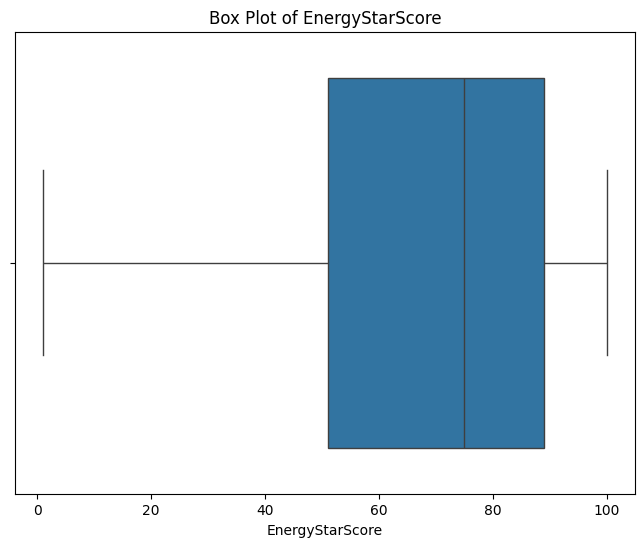

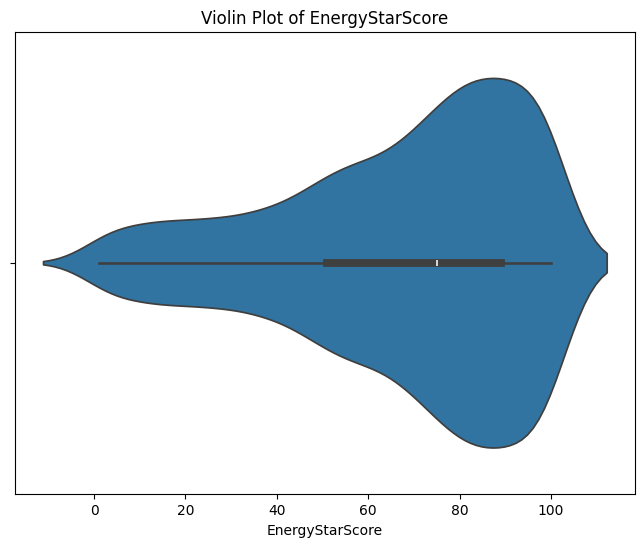

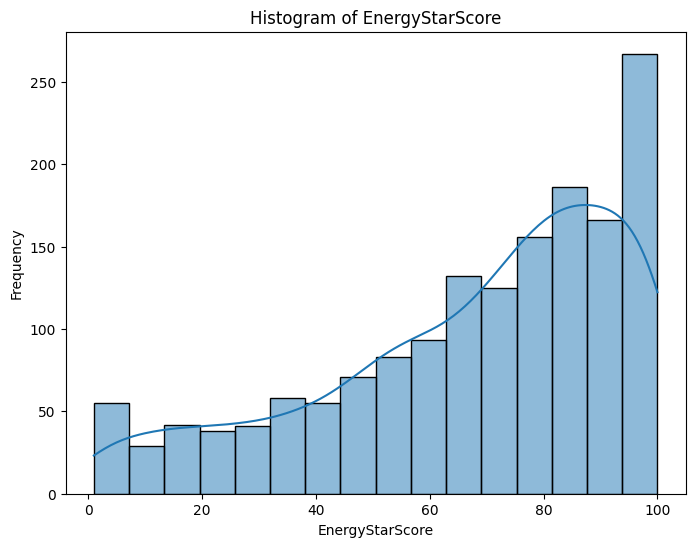

In [23]:
# prompt: make some plot for the energystarscore, like scatter, boxplot, violin, histgram

# Box plot of EnergyStarScore
plt.figure(figsize=(8, 6))
sns.boxplot(x='EnergyStarScore', data=repo_df_cleaned)
plt.title('Box Plot of EnergyStarScore')
plt.show()

# Violin plot of EnergyStarScore
plt.figure(figsize=(8, 6))
sns.violinplot(x='EnergyStarScore', data=repo_df_cleaned)
plt.title('Violin Plot of EnergyStarScore')
plt.show()

# Histogram of EnergyStarScore
plt.figure(figsize=(8, 6))
sns.histplot(repo_df_cleaned['EnergyStarScore'], kde=True)
plt.title('Histogram of EnergyStarScore')
plt.xlabel('EnergyStarScore')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# prompt: summarize property type column, find a list of value which input doesn't contain a ","

# Assuming 'repo_df_cleaned' is your DataFrame
property_type_column = repo_df_cleaned['AllPropertyTypes']

# Find values without a comma
property_types_without_comma = [
    value for value in property_type_column.unique() if ',' not in str(value)
]

print("Property types without a comma:", property_types_without_comma)

In [ ]:
# prompt: count all item in the property_types as counted in repo_df_cleaned['AllPropertyTypes'] and plot all in vertical

# Count the occurrences of each property type
property_type_counts = repo_df_cleaned['AllPropertyTypes'].value_counts()

# Plot the counts in a vertical bar chart
plt.figure(figsize=(40, 6))
property_type_counts.plot(kind='bar')
plt.title('Count of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# prompt: count all item in the property_types as counted in repo_df_cleaned['AllPropertyTypes']

# Assuming 'repo_df_cleaned' is your DataFrame
property_type_counts = {}

for property_types in repo_df_cleaned['AllPropertyTypes']:
  if pd.isnull(property_types):
    continue
  for property_type in str(property_types).split(','):
    property_type = property_type.strip()
    if property_type in property_type_counts:
      property_type_counts[property_type] += 1
    else:
      property_type_counts[property_type] = 1

print("Count of each property type:")
for property_type, count in property_type_counts.items():
  print(f"{property_type}: {count}")

In [ ]:
# prompt: count all item in the property_types_without_comma as counted in repo_df_cleaned['AllPropertyTypes']

# Assuming 'repo_df_cleaned' is your DataFrame
property_type_column = repo_df_cleaned['AllPropertyTypes']

# Find values without a comma
property_types_without_comma = [
    value for value in property_type_column.unique() if ',' not in str(value)
]

# Count the occurrences of each unique property type in 'AllPropertyTypes'
property_type_counts = repo_df_cleaned['AllPropertyTypes'].value_counts()

# Create a dictionary to store the counts for property types without commas
counts_for_property_types_without_comma = {}

for property_type in property_types_without_comma:
  if property_type in property_type_counts:
    counts_for_property_types_without_comma[property_type] = property_type_counts[property_type]

print("Counts for property types without commas:")
for property_type, count in counts_for_property_types_without_comma.items():
    print(f"{property_type}: {count}")

In [ ]:
# prompt: count all item in the property_types_without_comma as counted in repo_df_cleaned['AllPropertyTypes'], put into a dictionary and visualize in decreasing order, number on the graph

# Sort the dictionary in decreasing order of counts
sorted_counts = dict(sorted(counts_for_property_types_without_comma.items(), key=lambda item: item[1], reverse=True))

# Extract property types and counts for plotting
property_types = list(sorted_counts.keys())
counts = list(sorted_counts.values())

# Create a bar plot
plt.figure(figsize=(12, 10))
plt.bar(property_types, counts)
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Count of Property Types (Without Comma)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add count labels to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()